<a href="https://colab.research.google.com/github/Husnul66/Online-Retail-CRM-Project/blob/main/Online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# 1. KÜTÜPHANELER VE AYARLAR / LIBRARIES AND SETTINGS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
from mlxtend.frequent_patterns import apriori
import warnings


# Pandas görüntüleme ayarları (Çıktıların düzgün görünmesi için)
# Pandas display settings (For better output readability)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Sayıları virgülden sonra 2 basamak göster

# Gereksiz uyarıları kapatalım

warnings.filterwarnings("ignore")

print("Kütüphaneler başarıyla yüklendi ve ayarlar yapıldı.")

Kütüphaneler başarıyla yüklendi ve ayarlar yapıldı.


In [138]:
import pandas as pd
import io
import requests

# Veri setini s GitHub üzerınden direkt hafızaya çekiyoruz.
# Downloading the dataset directly from GitHub account as a ZIP file into memory.

url = "https://raw.githubusercontent.com/Husnul66/Online-Retail-CRM-Project/main/online_retail_II.zip.zip"

print(f"⏳ Veri indiriliyor: {url}")

# Pandas'ın ZIP okuması için  yöntem (Request ile çekip IO ile okumak)
response = requests.get(url)
z = io.BytesIO(response.content)

df = pd.read_csv(z, compression='zip', encoding="ISO-8859-1")

print("✅ Veri başarıyla yüklendi! Satır sayısı:", len(df))
df.head()

⏳ Veri indiriliyor: https://raw.githubusercontent.com/Husnul66/Online-Retail-CRM-Project/main/online_retail_II.zip.zip
✅ Veri başarıyla yüklendi! Satır sayısı: 1067371


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [139]:

df.to_csv('online_retail_10_11.csv', index=False)

print("✅ Dosya diske kaydedildi! Eski kodları artık çalışacak.")

✅ Dosya diske kaydedildi! Eski kodları artık çalışacak.


In [140]:

df = pd.read_csv("online_retail_10_11.csv", encoding="latin1")
print('The first 5 customers')
df.head()


The first 5 customers


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [141]:

df = pd.read_csv("online_retail_10_11.csv", encoding="latin1")
print("The last 5 customer")
df.tail()



The last 5 customer


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.00,France


In [142]:
df.describe()


,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [143]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [144]:
# Renaming columns for better readability and code consistency.
# Daha iyi okunabilirlik ve kod tutarlılığı için sütun isimlerinin değiştirilmesi.

df.rename(columns={"ï»¿InvoiceNo": "Invoice", "InvoiceNo": "Invoice","Customer ID":"CustomerID"}, inplace=True)

# Trimming whitespace from column names.
# Sütun isimlerindeki boşlukların temizlenmesi.

df.columns = df.columns.str.strip()

print("Sütun isimleri güncellendi:")
print(df.columns)

Sütun isimleri güncellendi:
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country'], dtype='object')


In [145]:
                           #  Handling Missing Values / Eksik Değerlerin Temizlenmesi


# Since the analysis is customer-based, rows with missing 'Customer ID' are dropped.
# Müşteri odaklı analiz yapılacağı için 'Customer ID'si olmayanlar silinir.

df.dropna(subset=['CustomerID'], inplace=True)


#  Removing Cancelled Transactions / İade İşlemlerinin Temizlenmesi:
#  Invoices starting with 'C' indicate cancellations / Fatura numarası 'C' ile başlayanlar iadedir.

df = df[~df["Invoice"].str.contains("C", na=False)]

# Filtering Outliers & Errors / Aykırı/Hatalı Veri Temizliği:
#  Quantity and Price must be greater than 0 / Miktar ve Fiyat 0'dan büyük olmalı.
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [146]:
#After analysing missing values/ Eksik degerlerin analiz ettikten sonra


df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
CustomerID,0
Country,0


In [147]:
# Creating 'TotalPrice' Variable: / Toplam Kazanç Değişkeninin Oluşturulması.
#  Total Price = Quantity * Price: / Toplam Tutar = Adet * Birim Fiyat.

df["TotalPrice"] = df["Quantity"] * df["Price"]

print("TotalPrice sütunu oluşturuldu! ")
df.head()
df.describe().T
#toplam_urun_turu=df['Description'].nunique()



TotalPrice sütunu oluşturuldu! 


,count,mean,std,min,25%,50%,75%,max
Quantity,805549.00,13.29,143.63,1.00,2.00,5.00,12.00,80995.00
Price,805549.00,3.21,29.20,0.00,1.25,1.95,3.75,10953.50
CustomerID,805549.00,15331.95,1696.74,12346.00,13982.00,15271.00,16805.00,18287.00
TotalPrice,805549.00,22.03,224.04,0.00,4.95,11.85,19.50,168469.60


In [148]:
toplam_urun_turu=df["Description"].nunique()
print(toplam_urun_turu)

5283


Description
WHITE HANGING HEART T-LIGHT HOLDER    5181
REGENCY CAKESTAND 3 TIER              3428
ASSORTED COLOUR BIRD ORNAMENT         2777
JUMBO BAG RED RETROSPOT               2702
REX CASH+CARRY JUMBO SHOPPER          2141
PARTY BUNTING                         2121
LUNCH BAG  BLACK SKULL.               2117
LUNCH BAG SPACEBOY DESIGN             1941
HOME BUILDING BLOCK WORD              1929
STRAWBERRY CERAMIC TRINKET BOX        1922
Name: count, dtype: int64


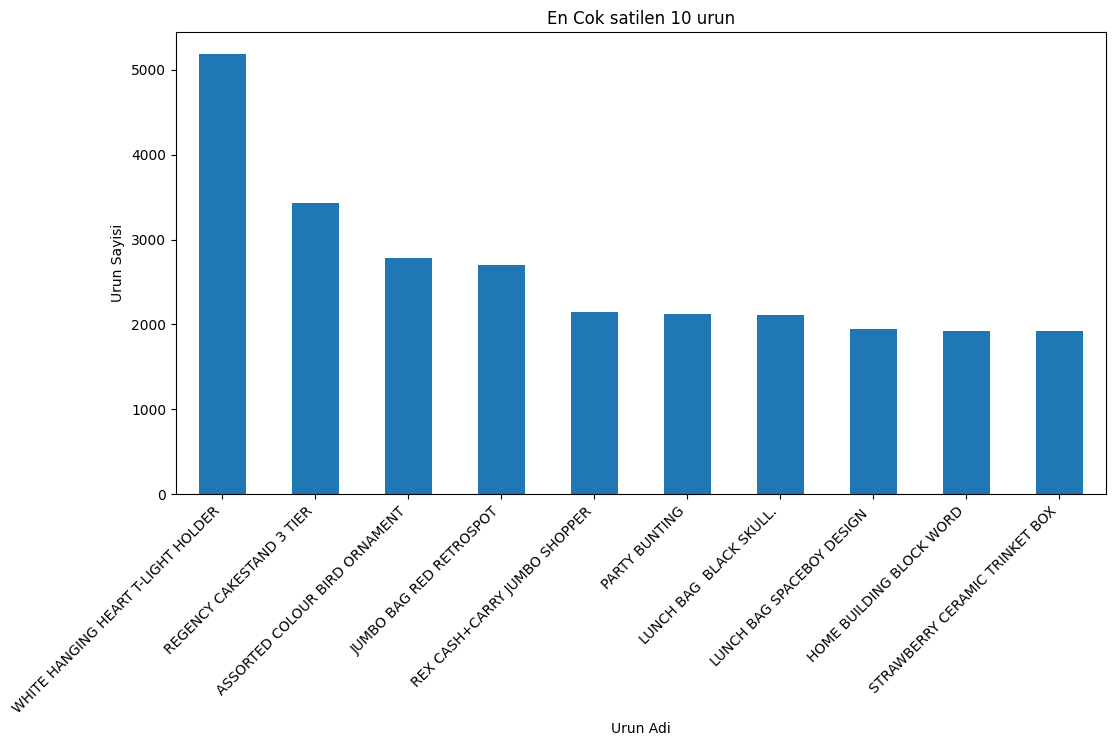

In [149]:
cok_satilan_urunler=df["Description"].value_counts().head(10)
print(cok_satilan_urunler.head(10))

plt.figure(figsize=(12,6))
cok_satilan_urunler.plot(kind='bar')
plt.title("En Cok satilen 10 urun")
plt.xlabel("Urun Adi")
plt.ylabel("Urun Sayisi")
plt.xticks(rotation=45,ha="right")
plt.show()

In [150]:
# --- Business Perspective & KPI Calculation ---
# --- İş Gözüyle Bakış ve KPI Hesaplamaları ---

# 1. Calculating Total Revenue to understand the financial volume of the dataset.
# 1. Veri setinin finansal hacmini anlamak için Toplam Cironun hesaplanması.
total_revenue = df["TotalPrice"].sum()

# 2. Calculating Total Sales Volume to measure operational scale.
# 2. Operasyonel ölçeği ölçmek için Toplam Satış Hacminin (Adet) hesaplanması.
total_quantity = df["Quantity"].sum()

# 3. Determining the size of the unique customer base (Customer Reach).
# 3. Eşsiz müşteri tabanının büyüklüğünün (Müşteri Erişimi) belirlenmesi.
unique_customers = df["CustomerID"].nunique()

# 4. Counting unique transactions to analyze order traffic.
# 4. Sipariş trafiğini analiz etmek için eşsiz işlem (fatura) sayısının sayılması.
total_invoices = df["Invoice"].nunique()

print(f"--- FINANCIAL SUMMARY / FİNANSAL ÖZET ---")
print(f"Total Revenue (Ciro): £{total_revenue:,.2f}")
print(f"Total Quantity Sold (Satılan Adet): {total_quantity:,}")
print(f"Unique Customers (Müşteri Sayısı): {unique_customers}")
print(f"Total Invoices (Sipariş Sayısı): {total_invoices}")

--- FINANCIAL SUMMARY / FİNANSAL ÖZET ---
Total Revenue (Ciro): £17,743,429.18
Total Quantity Sold (Satılan Adet): 10,706,167
Unique Customers (Müşteri Sayısı): 5878
Total Invoices (Sipariş Sayısı): 36969


                TotalPrice
Country                   
United Kingdom 14723147.52
EIRE             621631.11
Netherlands      554232.34
Germany          431262.46
France           355257.47
Australia        169968.11
Spain            109178.53
Switzerland      100365.34
Sweden            91549.72
Denmark           69862.19


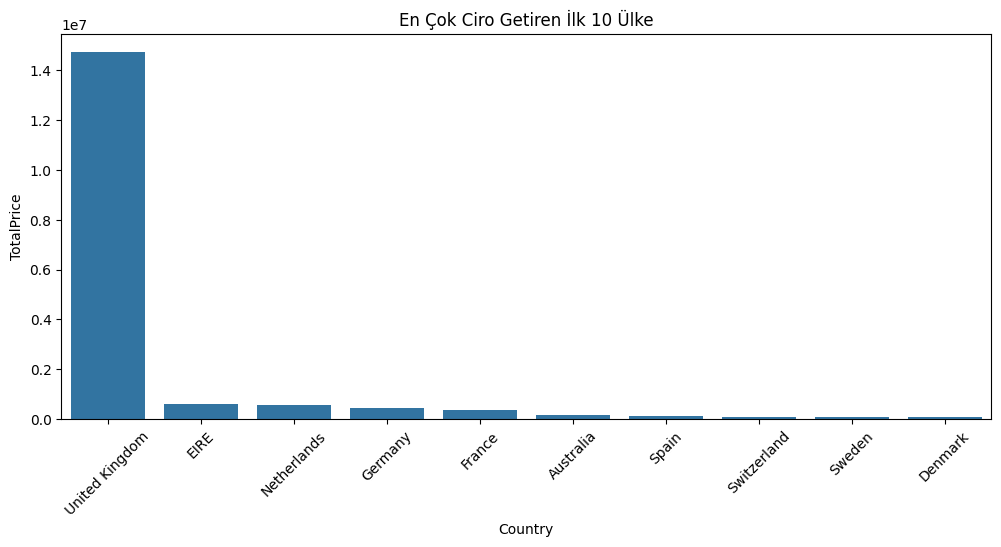

In [151]:
# Ülke bazında toplam ciroyu hesaplayıp, büyükten küçüğe sıralayalım
country_sales = df.groupby("Country").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head(10)

print(country_sales)

# Görselleştirme (Bar Chart)
plt.figure(figsize=(12, 5))
sns.barplot(x=country_sales.index, y=country_sales["TotalPrice"])
plt.title("En Çok Ciro Getiren İlk 10 Ülke")
plt.xticks(rotation=45) # Ülke isimleri sığsın diye eğik yazdırıyoruz
plt.show()

                sum  mean  count     max  min
Country                                      
Australia 169968.11 93.80   1812 1718.40 0.42
Austria    23613.01 25.61    922  360.00 1.65
Bahrain     1354.37 22.96     59  120.00 5.04
Belgium    65753.42 21.43   3068 1508.65 2.50
Brazil      1411.87 15.02     94  175.20 0.55


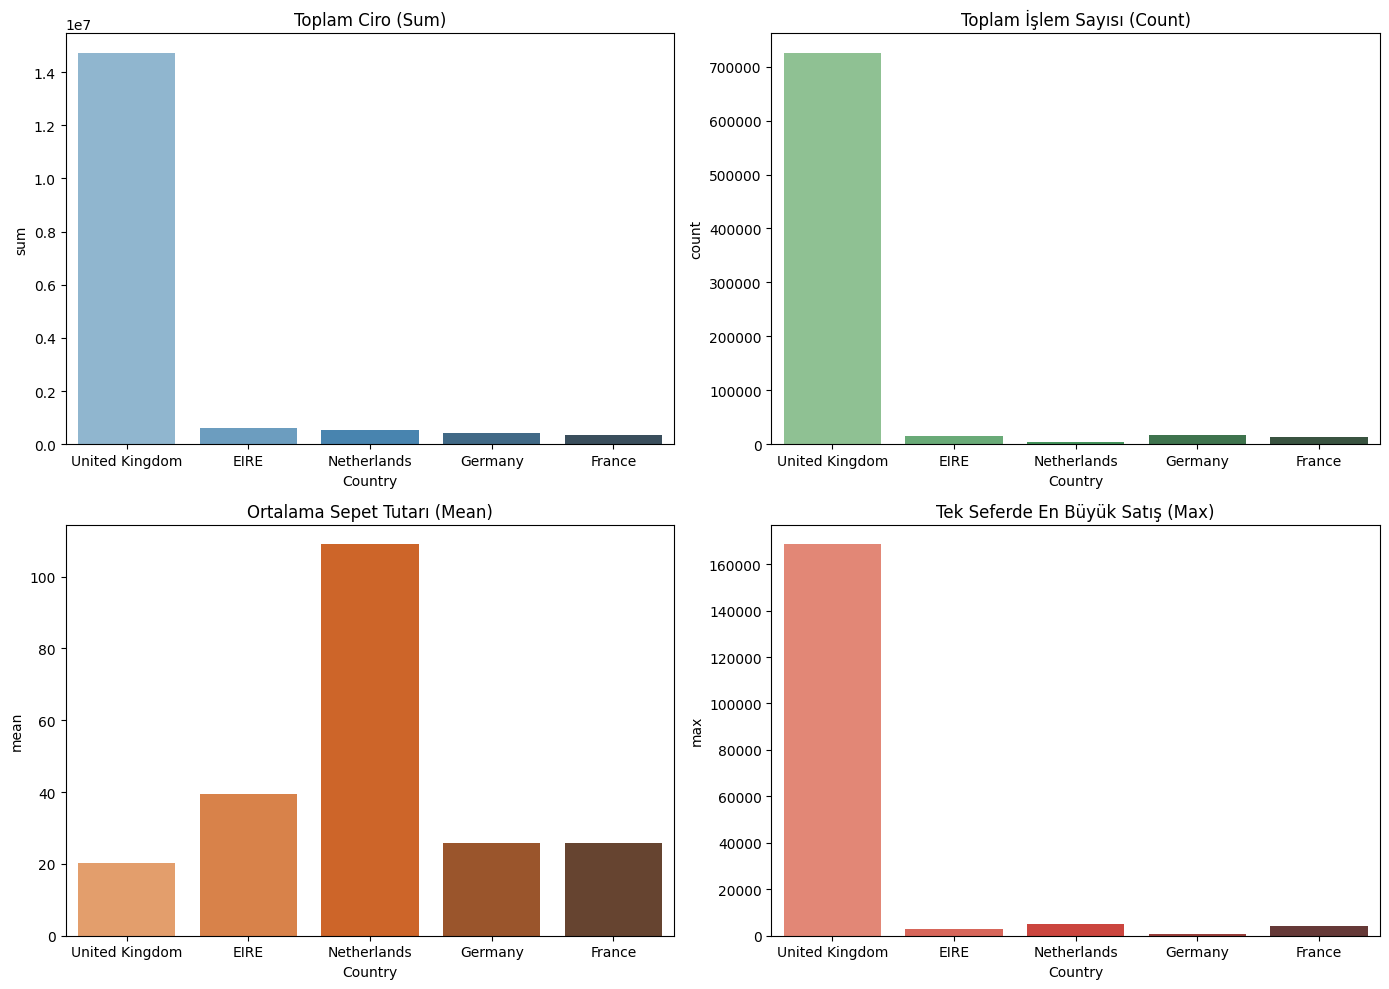

In [152]:
ulke_istatistikleri=df.groupby('Country')['TotalPrice'].agg(['sum','mean','count','max','min'])
print(ulke_istatistikleri.head())


# 1. Önce veriyi sıralayalım (Ciroya göre en iyi 5 ülkeyi alalım ki grafik karışmasın)
top_5_ulke = ulke_istatistikleri.sort_values("sum", ascending=False).head(5)

# 2. Tuvali 4 parçaya bölelim (2 Satır, 2 Sütun)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Grafik 1: Toplam Ciro (Sol Üst) ---
sns.barplot(x=top_5_ulke.index, y=top_5_ulke["sum"], ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("Toplam Ciro (Sum)")

# --- Grafik 2: İşlem Sayısı (Sağ Üst) ---
sns.barplot(x=top_5_ulke.index, y=top_5_ulke["count"], ax=axes[0, 1], palette="Greens_d")
axes[0, 1].set_title("Toplam İşlem Sayısı (Count)")

# --- Grafik 3: Ortalama Sepet Tutarı (Sol Alt) ---
sns.barplot(x=top_5_ulke.index, y=top_5_ulke["mean"], ax=axes[1, 0], palette="Oranges_d")
axes[1, 0].set_title("Ortalama Sepet Tutarı (Mean)")

# --- Grafik 4: En Büyük Tekil Satış (Sağ Alt) ---
sns.barplot(x=top_5_ulke.index, y=top_5_ulke["max"], ax=axes[1, 1], palette="Reds_d")
axes[1, 1].set_title("Tek Seferde En Büyük Satış (Max)")

plt.tight_layout() # Grafikler birbirine girmesin diye araları açar
plt.show()

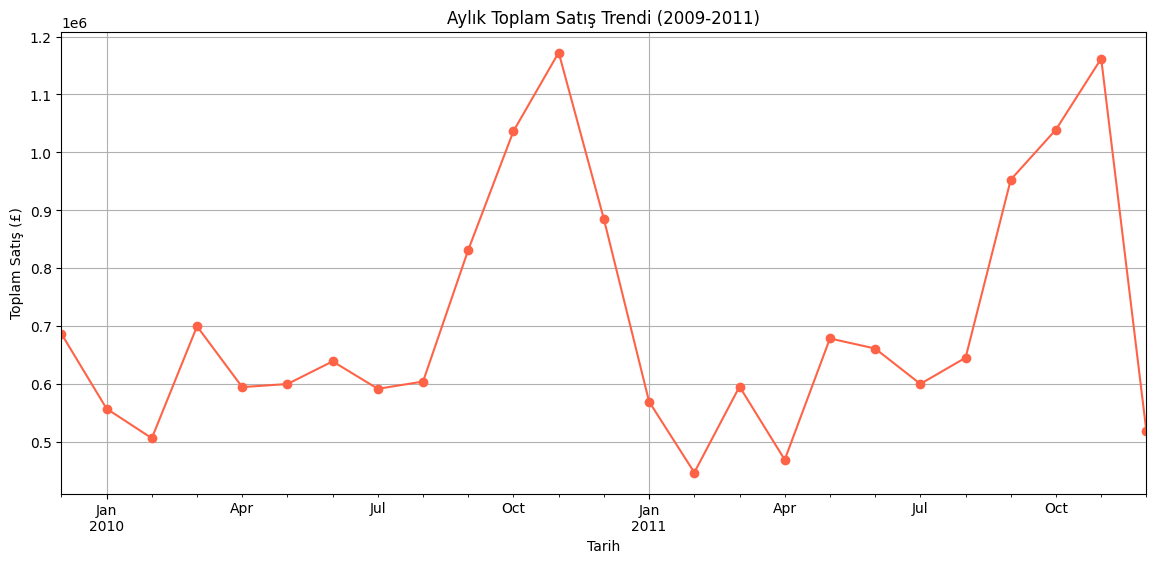

In [153]:
# InvoiceDate sütunu datetime formatında mı emin olalım
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Ay bazında (M: Month) satışları toplayalım (Resample)
# Bu işlem zaman serisi analizinin temelidir.
monthly_sales = df.set_index("InvoiceDate").resample("M")["TotalPrice"].sum()

# Görselleştirme (Line Chart)
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind="line", marker="o", color="tomato")
plt.title("Aylık Toplam Satış Trendi (2009-2011)")
plt.xlabel("Tarih")
plt.ylabel("Toplam Satış (£)")
plt.grid(True)
plt.show()

Yöntem 1 (qcut) Başarılı!

Price_Segment
Normal    301797
Ucuz      280334
Pahalı    223418
Name: count, dtype: int64
------------------------------
Yöntem 2 (cut) ile dağılım (Dengesizliğe dikkat):
Axes(0.125,0.11;0.775x0.77)


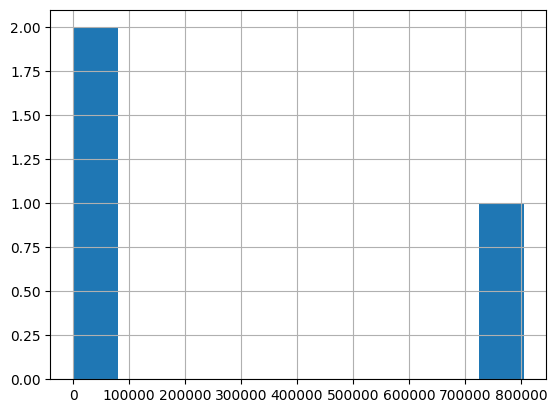

In [154]:
# Önce 'Price_Segment' diye yeni bir sütun açalım ve 3'e bölelim.
# labels= kısmına kategori isimlerini yazıyoruz.

# YÖNTEM 1: qcut (Eşit sayıda ürün barındıran gruplar - ÖNERİLEN)
try:
    df["Price_Segment"] = pd.qcut(df["Price"], 3, labels=["Ucuz", "Normal", "Pahalı"])
    print("Yöntem 1 (qcut) Başarılı!\n")
    print(df["Price_Segment"].value_counts())
except Exception as e:
    # Bazen çok fazla aynı fiyat varsa qcut hata verebilir, o zaman bu uyarı çıkar
    print("Hata oluştu (Aynı fiyattan çok fazla olabilir):", e)

print("-" * 30)

# YÖNTEM 2: cut (Matematiksel olarak aralığı böler)
# Bunu sadece farkı gör diye yazıyorum, değişkene atamıyoruz şu an.
temp_cut = pd.cut(df["Price"], 3, labels=["Ucuz", "Normal", "Pahalı"])
print("Yöntem 2 (cut) ile dağılım (Dengesizliğe dikkat):")
print(temp_cut.value_counts().hist())

In [155]:
# 1. Analiz Tarihi (Simülasyon)
last_date = df["InvoiceDate"].max()
today_date = last_date + dt.timedelta(days=2)

# 2. Metriklerin Hesaplanması
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days, # Recency
    'Invoice': lambda num: num.nunique(),                       # Frequency
    'TotalPrice': lambda price: price.sum()                     # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm["Monetary"] > 0]

# 3. Skorlama (1-5 Arası Puanlar)
# Recency'de küçük olan iyidir -> etiketler [5,4,3,2,1]
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
# Frequency'de büyük olan iyidir -> etiketler [1,2,3,4,5]
rfm["frequency_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# Monetary'de büyük olan iyidir -> etiketler [1,2,3,4,5]
rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# 4. Segmentasyon için R ve F skorunu birleştirme
# (Monetary genelde segment isimlendirmesinde kullanılmaz, R ve F yeterlidir)
rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

print("Skorlar hazır!")

Skorlar hazır!


In [156]:
# 1. Haritayı Tanımla
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

# 2. Segment Sütununu Oluştur (İşte eksik olan parça bu!)
rfm['Segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

# 3. Kontrol Et
print(rfm.head())

            Recency  Frequency  Monetary recency_score frequency_score monetary_score RF_SCORE              Segment
CustomerID                                                                                                         
12346.00        327         12  77556.46             2               5              5       25           Cant_Loose
12347.00          3          8   5633.32             5               4              5       54            Champions
12348.00         76          5   2019.40             3               4              4       34      Loyal_Customers
12349.00         20          4   4428.69             5               3              5       53  Potential_Loyalists
12350.00        311          1    334.40             2               1              2       21          Hibernating


                    Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
About_to_Sleep       108.11   385      1.36   385   534.07   385
At_Risk              373.67   753      3.90   753  1382.10   753
Cant_Loose           332.23    71     15.93    71  8355.68    71
Champions              9.56   837     19.34   837 10901.13   837
Hibernating          460.28  1523      1.25  1523   438.03  1523
Loyal_Customers       68.07  1161      9.84  1161  4211.84  1161
Need_Attention       114.36   266      3.15   266  1283.66   266
New_Customers         11.50    54      1.00    54   360.67    54
Potential_Loyalists   26.76   714      2.59   714  1155.71   714
Promising             39.83   114      1.00   114   319.43   114


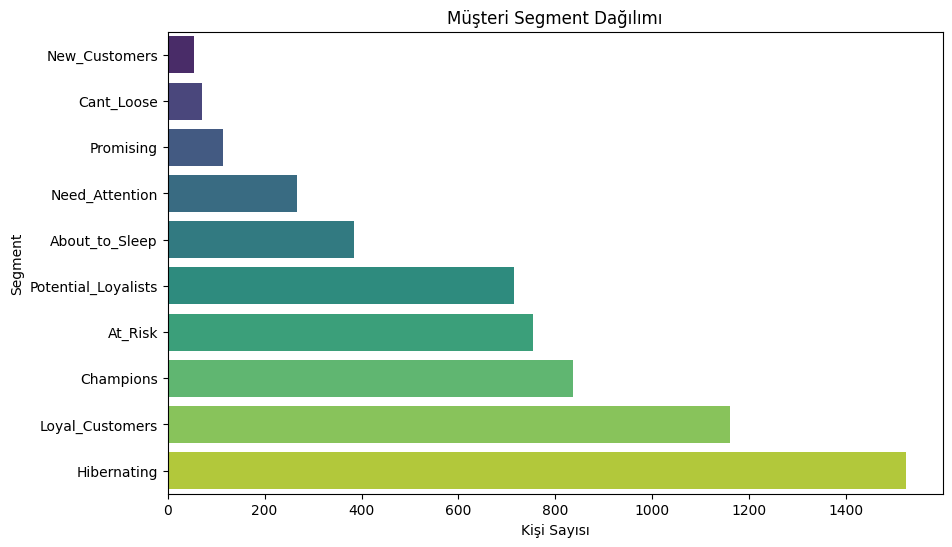

In [157]:
#SEGMENTATION
# Segmentlerin ortalamalarını ve kişi sayılarını hesaplayalım
# 1. Önce segment sütununa göre grupluyoruz.
# 2. Sonra hesaplamak istediğimiz sayısal sütunları seçiyoruz.
# 3. agg(["mean", "count"]) diyerek hem ortalamayı hem sayıyı istiyoruz.

segment_analysis = rfm.groupby("Segment")[ [ "Recency",  "Frequency",  "Monetary"]].agg(["mean", "count"])

print(segment_analysis)
# Segment Sayılarını Görselleştirme
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=segments_counts.values, y=segments_counts.index, palette="viridis")
plt.title("Müşteri Segment Dağılımı")
plt.xlabel("Kişi Sayısı")
plt.show()

In [158]:
print(rfm.columns)

Index(['Recency', 'Frequency', 'Monetary', 'recency_score', 'frequency_score', 'monetary_score', 'RF_SCORE', 'Segment'], dtype='object')


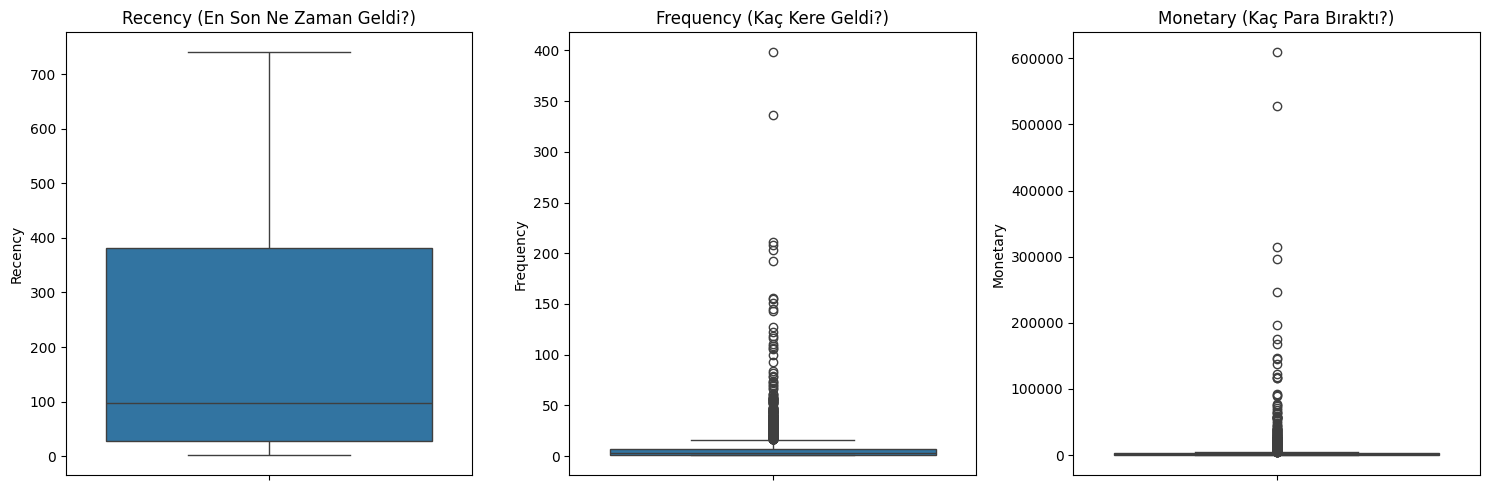

In [159]:


# --- BOX PLOT: Aykırı Değer Avcısı ---
# RFM tablosunun hafızada olduğunu varsayıyoruz

plt.figure(figsize=(15, 5))

# 1. Recency (Yenilik) Dağılımı
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm["Recency"])
plt.title("Recency (En Son Ne Zaman Geldi?)")

# 2. Frequency (Sıklık) Dağılımı
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm["Frequency"])
plt.title("Frequency (Kaç Kere Geldi?)")

# 3. Monetary (Harcama) Dağılımı
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm["Monetary"])
plt.title("Monetary (Kaç Para Bıraktı?)")

plt.tight_layout()
plt.show()

In [160]:
print('iadeleri silinmeden once faturalarin sayisi')
invoice_sayisi=df['Quantity'].nunique()
print(invoice_sayisi)


# 1. İadeleri (Invoice başında 'C' olanlar) garanti olsun diye tekrar filtreleyelim
df_germany = df[~df["Invoice"].str.contains("C", na=False)]

# 2. Sadece Almanya'yı seçelim (Veri seti küçülür, analiz hızlanır ve daha anlamlı olur)
df_germany = df_germany[df_germany['Country'] == 'Germany']

# 3. Kontrol edelim
print(f"Almanya İşlem Sayısı: {len(df_germany)}")
print(df_germany.head())

print('iadelerin silinmesinden  sonra faturalarin sayisi')
invoice_sayisi=df['Quantity'].nunique()
print(invoice_sayisi)

iadeleri silinmeden once faturalarin sayisi
437
Almanya İşlem Sayısı: 16694
    Invoice StockCode                      Description  Quantity         InvoiceDate  Price  CustomerID  Country  TotalPrice Price_Segment
579  489526    85049E        SCANDINAVIAN REDS RIBBONS        12 2009-12-01 11:50:00   1.25    12533.00  Germany       15.00          Ucuz
580  489526     21976   PACK OF 60 MUSHROOM CAKE CASES        24 2009-12-01 11:50:00   0.55    12533.00  Germany       13.20          Ucuz
581  489526     21498                 RED SPOTS  WRAP         25 2009-12-01 11:50:00   0.42    12533.00  Germany       10.50          Ucuz
582  489526     22077           6 RIBBONS RUSTIC CHARM        12 2009-12-01 11:50:00   1.65    12533.00  Germany       19.80        Normal
583  489526     84946  ANTIQUE SILVER TEA GLASS ETCHED        12 2009-12-01 11:50:00   1.25    12533.00  Germany       15.00          Ucuz
iadelerin silinmesinden  sonra faturalarin sayisi
437


(0.0, 919.79995)

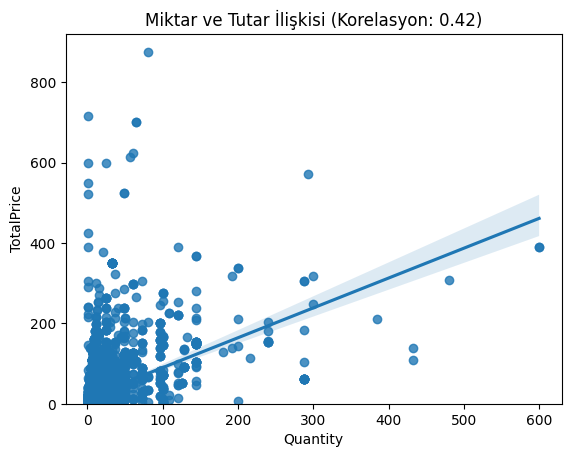

In [161]:

import scipy.stats as stats

# Önce grafiği çiz
sns.regplot(x='Quantity', y='TotalPrice', data=df_germany)

# Korelasyon katsayısını hesapla (r değeri)
r, p = stats.pearsonr(df_germany['Quantity'], df_germany['TotalPrice'])


plt.title(f"Miktar ve Tutar İlişkisi (Korelasyon: {r:.2f})")
plt.ylim(0,)


In [162]:


# 1. O kırmızı uyarı kalabalığını susturalım
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# --- ADIM 2 (Tekrar): Matrisi Hazırlama ---
# (df_germany'nin hafızada olduğunu varsayıyoruz)
basket = (df_germany.groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().fillna(0))

basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

if 'POSTAGE' in basket_encoded.columns:
    basket_encoded.drop('POSTAGE', inplace=True, axis=1)

print("Matris Hazır, Boyut:", basket_encoded.shape)

# --- ADIM 3: Apriori Algoritması ---
# Şimdi temiz bir çıktı verecek
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

print("\n--- Sık Geçen Ürünler Bulundu! ---")
print(frequent_itemsets.sort_values("support", ascending=False).head())

Matris Hazır, Boyut: (789, 2409)

--- Sık Geçen Ürünler Bulundu! ---
      support                                           itemsets
445      0.26              (ROUND SNACK BOXES SET OF4 WOODLAND )
443      0.17               (ROUND SNACK BOXES SET OF 4 FRUITS )
585      0.17                           (WOODLAND CHARLOTTE BAG)
1834     0.14  (ROUND SNACK BOXES SET OF 4 FRUITS , ROUND SNA...
344      0.14                 (PLASTERS IN TIN WOODLAND ANIMALS)


In [163]:
from mlxtend.frequent_patterns import association_rules

# 1. Kuralları Oluştur
# metric="lift": İlişkinin gücüne bakar (En önemli kriterdir)
# min_threshold=1: "Lift puanı 1'in üzerinde olanları (birbirini etkileyenleri) getir"
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# 2. En güçlü ilişkiden en zayıfa doğru sırala
rules = rules.sort_values("lift", ascending=False)

# 3. Sadece işimize yarayacak sütunları gösterelim (Kafa karışıklığını önlemek için)
# antecedents: Bunu Alan... (İLK ÜRÜN)
# consequents: ...Bunu da Aldı (İKİNCİ ÜRÜN)
# lift: Satış ihtimalini kaç kat artırıyor?
sonuc_tablosu = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

print(sonuc_tablosu.head(10))

def urun_oner(urun_ismi, kurallar_tablosu, limit=3):
    # 1. Önce ürünün adını tablodaki formatla eşleştirelim (antecedents sütununda ara)
    # (frozenset yapısı olduğu için 'icinde var mı' diye bakıyoruz)
    onerilenler = kurallar_tablosu[kurallar_tablosu["antecedents"].apply(lambda x: urun_ismi in x)]

    # 2. Hiç kural bulamazsa (yani bu ürünle ilgili bir ilişki yoksa)
    if onerilenler.empty:
        return "Bu ürün için henüz yeterli veri yok veya anlamlı bir ilişki bulunamadı."

    # 3. Bulunan kuralları LIFT puanına göre sırala (En güçlüler en üste)
    onerilenler = onerilenler.sort_values("lift", ascending=False)

    # 4. Sadece önerilen ürünlerin isimlerini (consequents) alıp listeye çevir
    # (Set içinden stringi çıkarmak için list(x)[0] yapıyoruz)
    oneri_listesi = [list(x)[0] for x in onerilenler["consequents"].values]

    return oneri_listesi[:limit]

# 1. ADIM: En çok satılan 5 ürünün ismini bul
# (Kuralları Almanya verisiyle çıkardığımız için burada da df_germany kullanıyoruz)
en_cok_satanlar = df_germany.groupby("Description").agg({"Quantity": "sum"})\
                            .sort_values("Quantity", ascending=False)\
                            .head(5).index

print(f"En Çok Satan 5 Ürün Belirlendi: \n{list(en_cok_satanlar)}")
print("\n" + "="*60 + "\n")

# 2. ADIM: Bu ürünlerin her biri için öneri motorunu çalıştır
for urun in en_cok_satanlar:
    print(f" İNCELENEN POPÜLER ÜRÜN: {urun}")

    # Senin yazdığın fonksiyonu çağırıyoruz
    oneriler = urun_oner(urun, rules)

    # Sonuçları ekrana düzgünce yazdıralım
    # (Eğer sonuç listeyse ve içinde 'ilişki bulunamadı' yazmıyorsa)
    if isinstance(oneriler, list) and len(oneriler) > 0 and "İlişki bulunamadı" not in oneriler[0]:
        for i, tavsiye in enumerate(oneriler, 1):
            print(f"   ✅ {i}. Öneri: {tavsiye}")
    else:
        print("   ❌ Bu ürün çok satıyor ama yanında belirgin bir eşlikçisi yok (Tek alınıyor).")

    print("-" * 60) # Araya ayırıcı çizgi

                                             antecedents                                        consequents  support  confidence  lift
15807            (GREEN  SPOTTY PLATE , RED SPOTTY BOWL)  (GREEN SPOTTY BOWL, RED SPOTTY PLATE , RED SPO...     0.01        1.00 98.62
15802  (GREEN SPOTTY BOWL, RED SPOTTY PLATE , RED SPO...            (GREEN  SPOTTY PLATE , RED SPOTTY BOWL)     0.01        1.00 98.62
15809             (GREEN SPOTTY BOWL, RED SPOTTY PLATE )  (GREEN  SPOTTY PLATE , RED SPOTTY BOWL, RED SP...     0.01        1.00 98.62
15800  (GREEN  SPOTTY PLATE , RED SPOTTY BOWL, RED SP...             (GREEN SPOTTY BOWL, RED SPOTTY PLATE )     0.01        1.00 98.62
10640             (GREEN SPOTTY BOWL, RED SPOTTY PLATE )            (GREEN  SPOTTY PLATE , RED SPOTTY BOWL)     0.01        1.00 98.62
10637            (GREEN  SPOTTY PLATE , RED SPOTTY BOWL)             (GREEN SPOTTY BOWL, RED SPOTTY PLATE )     0.01        1.00 98.62
994                                (HAPPY STENCIL CRAFT

In [164]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# ---------------------------------------------------------
# ADIM 1: EKSİK OLAN TABLOLARI OLUŞTURALIM (Burayı eklemen şart)
# ---------------------------------------------------------
print("⏳ Analiz verileri hazırlanıyor...")

# 1. Sadece Almanya verisini alalım (Eğer df hafızadaysa)
# (Eğer df yoksa önce en baştaki veri yükleme kodunu çalıştır)
df_germany = df[df['Country'] == 'Germany'].copy()

# 2. Sepet Matrisini Hazırlayalım (Hangi faturada hangi ürün var?)
# (Quantity > 0 olmalı ve İptal işlemleri 'C' olmamalı)
df_germany = df_germany[~df_germany["Invoice"].astype(str).str.contains("C", na=False)]
df_germany = df_germany[df_germany["Quantity"] > 0]

basket = (df_germany.groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().fillna(0)
          .apply(lambda x: x.map(lambda y: 1 if y > 0 else 0))) # applymap yerine map kullandık

# 3. Apriori Algoritmasını Çalıştıralım
# (min_support=0.01 demek, en az %1 oranında görülen ürünleri al)
frequent_items = apriori(basket.astype(bool), min_support=0.01, use_colnames=True)

# 4. Kuralları Çıkaralım (excel_rules değişkeni burada oluşuyor!)
excel_rules = association_rules(frequent_items, metric="lift", min_threshold=1)

# 5. Öneri Raporunu Oluşturalım (df_oneri_raporu değişkeni burada oluşuyor!)
# (Lift değerine göre sıralayıp en güçlü 20 kuralı alıyoruz)
df_oneri_raporu = excel_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(20)

print("✅ Eksik tablolar (df_oneri_raporu) başarıyla oluşturuldu!")


# ---------------------------------------------------------
# ADIM 2: SENİN YAZDIĞIN RAPORLAMA KODU (Artık hata vermez)
# ---------------------------------------------------------

# --- HAZIRLIK 1: Yönetici Özeti ---
toplam_ciro = df_germany["TotalPrice"].sum()
toplam_islem = df_germany["Invoice"].nunique()
# En popüler ürün hesaplamasında ufak bir düzeltme (idxmax bazen hata verebilir, garanti yöntem:)
en_populer_urun = df_germany.groupby("Description")["Quantity"].sum().sort_values(ascending=False).index[0]

ozet_veri = {
    "Metrik": ["Toplam Ciro (Almanya)", "Toplam Fatura Sayısı", "En Çok Satan Ürün"],
    "Değer": [f"{toplam_ciro:.2f} EURO", toplam_islem, en_populer_urun],
    "Yorum": ["Pazar hacmimiz", "Müşteri trafiği", "Stokta mutlaka bulunmalı"]
}
df_ozet = pd.DataFrame(ozet_veri)

# --- DOSYAYI OLUŞTURMA ---
dosya_ismi = "Profesyonel_Almanya_Raporu.xlsx"

with pd.ExcelWriter(dosya_ismi, engine='openpyxl') as writer:
    # 1. Sayfa: ÖZET
    df_ozet.to_excel(writer, sheet_name='1-Yonetici_Ozeti', index=False)

    # 2. Sayfa: AKSİYON (Artık bu değişken var!)
    df_oneri_raporu.to_excel(writer, sheet_name='2-Urun_Onerileri', index=False)

    # 3. Sayfa: DETAY
    excel_rules.to_excel(writer, sheet_name='3-Tum_Kurallar_Detay', index=False)

    # (Eğer RFM tablosu hafızanda duruyorsa ekler)
    if 'rfm' in locals():
         rfm.to_excel(writer, sheet_name='4-Musteri_Segmentleri')

print(f"✅ PROFESYONEL RAPOR HAZIR: {dosya_ismi}")
print("İçinde 3 (veya 4) farklı sayfa olan tek bir dosya indirildi.")

⏳ Analiz verileri hazırlanıyor...
✅ Eksik tablolar (df_oneri_raporu) başarıyla oluşturuldu!
✅ PROFESYONEL RAPOR HAZIR: Profesyonel_Almanya_Raporu.xlsx
İçinde 3 (veya 4) farklı sayfa olan tek bir dosya indirildi.
